In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sheet_1small.csv')

In [4]:
df

,response_id,class,response_text,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,response_1,not_flagged,I try and avoid this sort of conflict,NaN,NaN,NaN,NaN,NaN
1,response_2,flagged,Had a friend open up to me about his mental ad...,NaN,NaN,NaN,NaN,NaN
2,response_3,flagged,I saved a girl from suicide once. She was goin...,NaN,NaN,NaN,NaN,NaN
3,response_4,not_flagged,i cant think of one really...i think i may hav...,NaN,NaN,NaN,NaN,NaN
4,response_5,not_flagged,Only really one friend who doesn't fit into th...,,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
75,response_76,not_flagged,"Now that I've been through it, although i'm no...",NaN,NaN,NaN,NaN,NaN
76,response_77,flagged,when my best friends mom past away from od'ing...,NaN,NaN,NaN,NaN,NaN
77,response_78,not_flagged,As a camp counselor I provide stability in kid...,NaN,NaN,NaN,NaN,NaN
78,response_79,flagged,My now girlfriend used to have serious addicti...,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum()

response_id       0
class             0
response_text     0
Unnamed: 3       78
Unnamed: 4       80
Unnamed: 5       79
Unnamed: 6       80
Unnamed: 7       79
dtype: int64

In [7]:
df.columns


Index(['response_id', 'class', 'response_text', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'],
      dtype='object')

In [10]:
df=df.drop(columns=['response_id', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'])

In [11]:
df

,class,response_text
0,not_flagged,I try and avoid this sort of conflict
1,flagged,Had a friend open up to me about his mental ad...
2,flagged,I saved a girl from suicide once. She was goin...
3,not_flagged,i cant think of one really...i think i may hav...
4,not_flagged,Only really one friend who doesn't fit into th...
...,...,...
75,not_flagged,"Now that I've been through it, although i'm no..."
76,flagged,when my best friends mom past away from od'ing...
77,not_flagged,As a camp counselor I provide stability in kid...
78,flagged,My now girlfriend used to have serious addicti...


In [12]:
df['num_words'] = df['response_text'].apply(lambda x: len(x.split(" ")))

<Axes: >

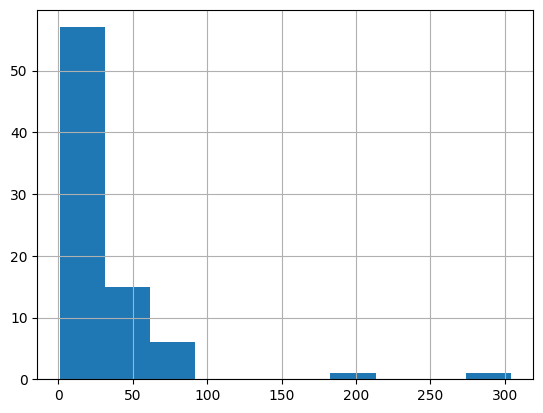

In [14]:
df['num_words'].hist()

In [15]:
max_tokens=80

In [19]:
df['class'].value_counts()

not_flagged    55
flagged        25
Name: class, dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['class']=encoder.fit_transform(df['class'])

In [21]:
df

,class,response_text,num_words
0,1,I try and avoid this sort of conflict,8
1,0,Had a friend open up to me about his mental ad...,25
2,0,I saved a girl from suicide once. She was goin...,29
3,1,i cant think of one really...i think i may hav...,11
4,1,Only really one friend who doesn't fit into th...,74
...,...,...,...
75,1,"Now that I've been through it, although i'm no...",62
76,0,when my best friends mom past away from od'ing...,15
77,1,As a camp counselor I provide stability in kid...,16
78,0,My now girlfriend used to have serious addicti...,73


In [22]:
X,Y=df['response_text'],df['class']

In [23]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.models import Sequential
import keras
from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, LSTM, Flatten
from sklearn.metrics import confusion_matrix, classification_report,f1_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [27]:
tokenizer = Tokenizer(num_words=max_tokens)
tokenizer.fit_on_texts(X_train.values)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [28]:
len_tokens = [len(token_list) for token_list in X_train]

(array([43., 14.,  3.,  2.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([  0. ,  17.4,  34.8,  52.2,  69.6,  87. , 104.4, 121.8, 139.2,
        156.6, 174. ]),
 <BarContainer object of 10 artists>)

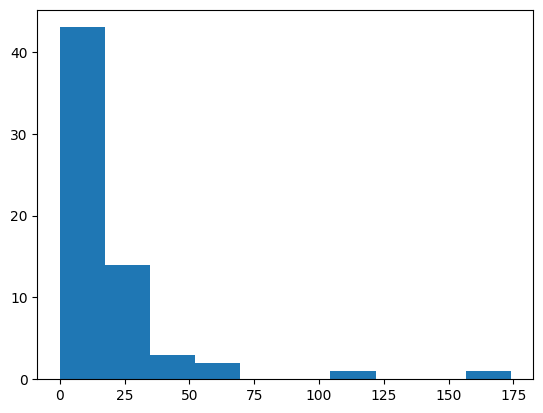

In [29]:
plt.hist(len_tokens)

In [30]:
maxlen=50

In [31]:
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [32]:
X_train.shape

(64, 50)

In [53]:
model = Sequential()

model.add(Embedding(max_tokens, 32, input_length=X_train.shape[1]))

model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(16, dropout=0.2, recurrent_dropout=0.2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [54]:
model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=[keras.metrics.Precision(), keras.metrics.Recall()])

In [60]:
history = model.fit(X_train, Y_train.values, validation_split=0.2, batch_size=32, epochs=20)

Epoch 1/20
2/2 [==============================] - 0s 152ms/step - loss: 0.5277 - precision_2: 0.7451 - recall_2: 1.0000 - val_loss: 0.8880 - val_precision_2: 0.5385 - val_recall_2: 1.0000
Epoch 2/20
2/2 [==============================] - 0s 101ms/step - loss: 0.5285 - precision_2: 0.7451 - recall_2: 1.0000 - val_loss: 0.8381 - val_precision_2: 0.5385 - val_recall_2: 1.0000
Epoch 3/20
2/2 [==============================] - 0s 115ms/step - loss: 0.5193 - precision_2: 0.7451 - recall_2: 1.0000 - val_loss: 0.8021 - val_precision_2: 0.5385 - val_recall_2: 1.0000
Epoch 4/20
2/2 [==============================] - 0s 87ms/step - loss: 0.5097 - precision_2: 0.7451 - recall_2: 1.0000 - val_loss: 0.7842 - val_precision_2: 0.5385 - val_recall_2: 1.0000
Epoch 5/20
2/2 [==============================] - 0s 67ms/step - loss: 0.5046 - precision_2: 0.7451 - recall_2: 1.0000 - val_loss: 0.7779 - val_precision_2: 0.5385 - val_recall_2: 1.0000
Epoch 6/20
2/2 [==============================] - 0s 84ms/step

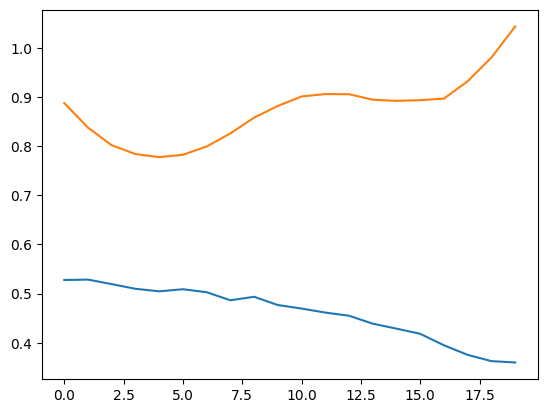

In [61]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.show()

In [62]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 20ms/step


In [63]:
print(classification_report(Y_test, np.round(y_pred)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.62      1.00      0.77        10

    accuracy                           0.62        16
   macro avg       0.31      0.50      0.38        16
weighted avg       0.39      0.62      0.48        16



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
f1_score(Y_test,np.round(y_pred))

0.7692307692307693

In [71]:
#df1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/shbig.csv')